In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from skle

In [2]:
df=pd.read_csv("train.csv")
display(df.head(3))
print(df.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


(1460, 81)


In [3]:
pd.options.display.max_rows
pd.set_option("display.max_rows",None)

display(df.isnull().sum().sort_values(ascending=False).head(20))

# Now, let's look at the percentage of null values to decide dropping them

print("Percentage of PoolQC: % {:.4f}".format((df["PoolQC"].isnull().sum())/len(df)*100))
print("Percentage of MiscFeature: % {:.4f}".format((df["MiscFeature"].isnull().sum())/len(df)*100))
print("Percentage of Alley: % {:.4f}".format((df["Alley"].isnull().sum())/len(df)*100))
print("Percentage of Fence: % {:.4f}".format((df["Fence"].isnull().sum())/len(df)*100))
print("Percentage of FireplaceQu: % {:.4f}".format((df["FireplaceQu"].isnull().sum())/len(df)*100))
print("Percentage of LotFrontage: % {:.4f}".format((df["LotFrontage"].isnull().sum())/len(df)*100))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

Percentage of PoolQC: % 99.5205
Percentage of MiscFeature: % 96.3014
Percentage of Alley: % 93.7671
Percentage of Fence: % 80.7534
Percentage of FireplaceQu: % 47.2603
Percentage of LotFrontage: % 17.7397


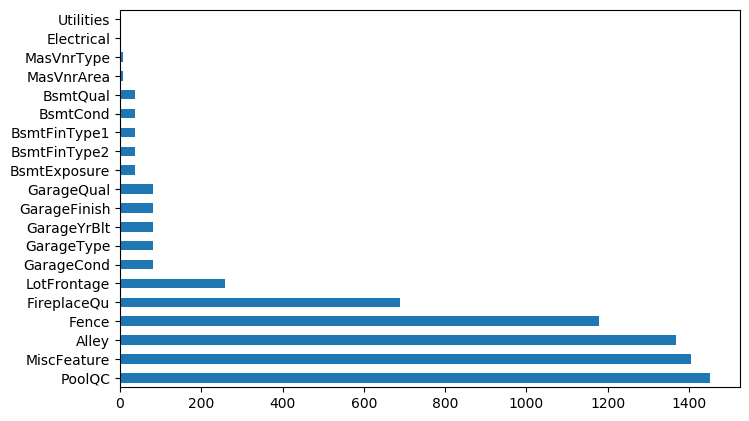

In [4]:
# Let'S visualize, how much are there missing values in this dataset?

miss=df.isnull().sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(8,5),dpi=100)
miss_val=pd.Series(miss, miss.index)
miss_val.plot(kind="barh");

In [5]:
# We can drop first 5 columns and "id" column

df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","Id"], axis=1, inplace=True)

df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [6]:
df.isnull().sum().sort_values(ascending=False)

# Fill with mean() function the numerical variables and fill with mode() function the categorical variables

df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)
df["GarageType"].fillna(df["GarageType"].mode()[0], inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0], inplace=True)
df["GarageFinish"].fillna(df["GarageFinish"].mode()[0], inplace=True)
df["GarageCond"].fillna(df["GarageCond"].mode()[0], inplace=True)
df["GarageQual"].fillna(df["GarageQual"].mode()[0], inplace=True)
df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0], inplace=True)
df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0], inplace=True)
df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0], inplace=True)
df["BsmtCond"].fillna(df["BsmtCond"].mode()[0], inplace=True)
df["BsmtQual"].fillna(df["BsmtQual"].mode()[0], inplace=True)
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0], inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].mode()[0], inplace=True)
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

print("Are there any missing values in all dataset: ", (df.isnull().sum()>0).any())

Are there any missing values in all dataset:  False


In [7]:
# Convert to date.year() type from float type including year column

df["GarageYrBlt"]=df["GarageYrBlt"].astype("int64")

In [8]:
df_cat=df.select_dtypes(include="O")
df_num=df.select_dtypes(exclude="O")

display(df_cat.head(2))
display(df_num.head(2))

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500


In [9]:
df_cat_col=df.select_dtypes(exclude="O").columns
df_year=pd.DataFrame()

# "YrSold" column must be hifher than other columns in df_year dataframe, so we should check it:

for k in range(len(df_cat_col)):
    if ("Year" in df_cat_col[k]) or ("Yr" in df_cat_col[k]):
        df_year=df_year.append(df[df_cat_col[k]]) 
        
df_year=df_year.T        
display(df_year.head()) 

print("YearBuilt column is higher than YrSold column", np.where(df_year["YearBuilt"]>df_year["YrSold"]),"\n")
print("YearRemodAdd column is higher than YrSold column", np.where(df_year["YearRemodAdd"]>df_year["YrSold"]),"\n")
print("GarageYrBlt column is higher than YrSold column", np.where(df_year["GarageYrBlt"]>df_year["YrSold"]))

# YearRemodAdd column has a wrong value, so we must change it

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003.0,2003.0,2003.0,2008.0
1,1976.0,1976.0,1976.0,2007.0
2,2001.0,2002.0,2001.0,2008.0
3,1915.0,1970.0,1998.0,2006.0
4,2000.0,2000.0,2000.0,2008.0


YearBuilt column is higher than YrSold column (array([], dtype=int64),) 

YearRemodAdd column is higher than YrSold column (array([523], dtype=int64),) 

GarageYrBlt column is higher than YrSold column (array([], dtype=int64),)


In [10]:
for index, row in df_year.iterrows():
    if row["YearRemodAdd"]>row["YrSold"]:
        print(index, row["YearRemodAdd"], row["YrSold"])

# At 523. row, YearRemodAdd is higher than YrSold, now i will replace "2008.0 "

523 2008.0 2007.0


In [11]:
df["YearRemodAdd"][523]=2007
# We changed the specific row with 2007

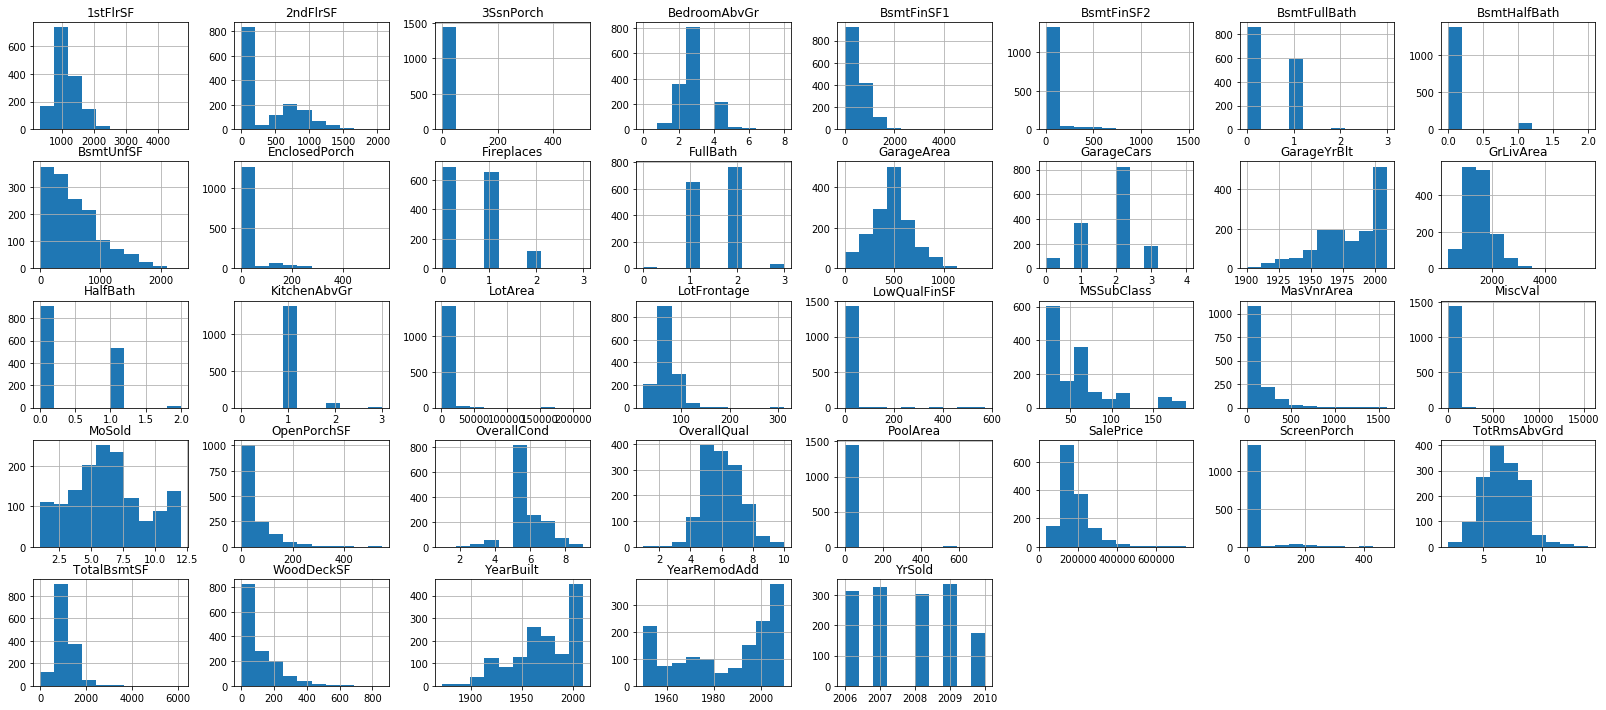

In [13]:
df_num.hist(layout=(10,8), figsize=(28,25))

plt.show()

# Like we see in the graphs, most of variables is not the normal distributions, to predict target value we should normalize them

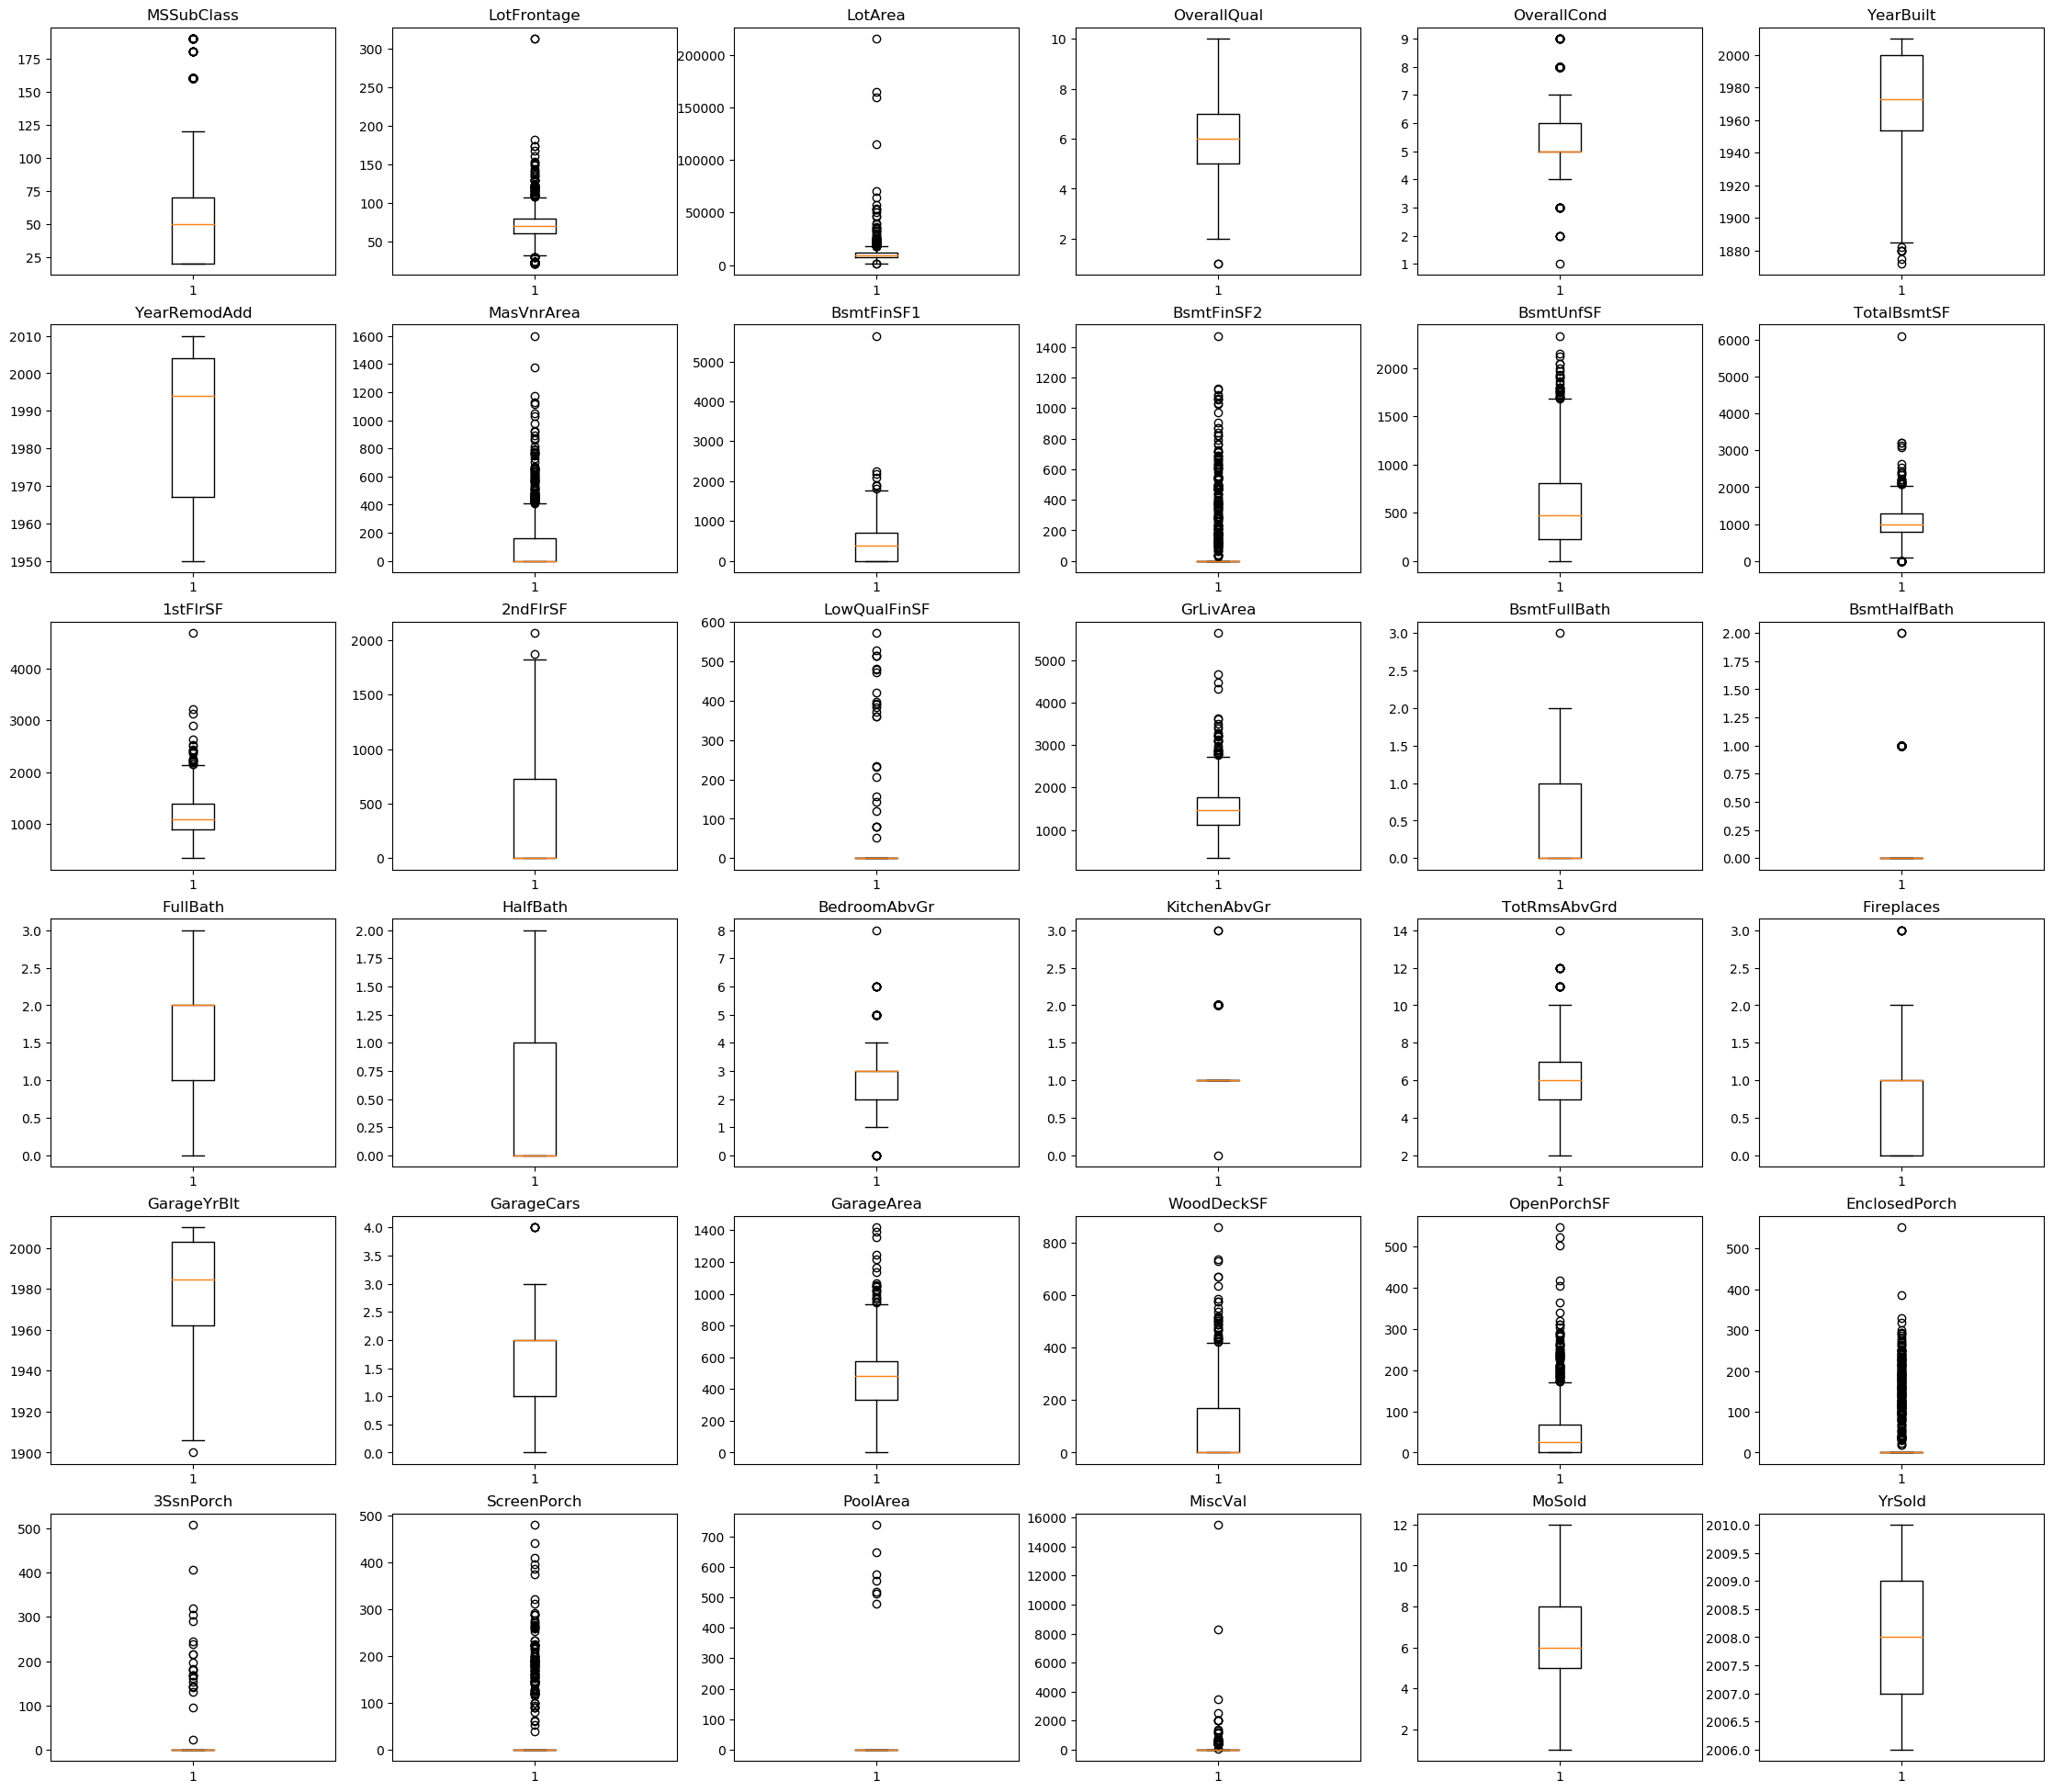

In [14]:
# OUTLIERS:

df_num_col = list(df_num.iloc[:,:36].columns)

plt.figure(figsize=(28,25),dpi=100)
for i in range(len(df_num_col)):
    plt.subplot(6,6,i+1)
    plt.title(df_num_col[i])
    plt.boxplot(df_num[df_num_col[i]]);
    

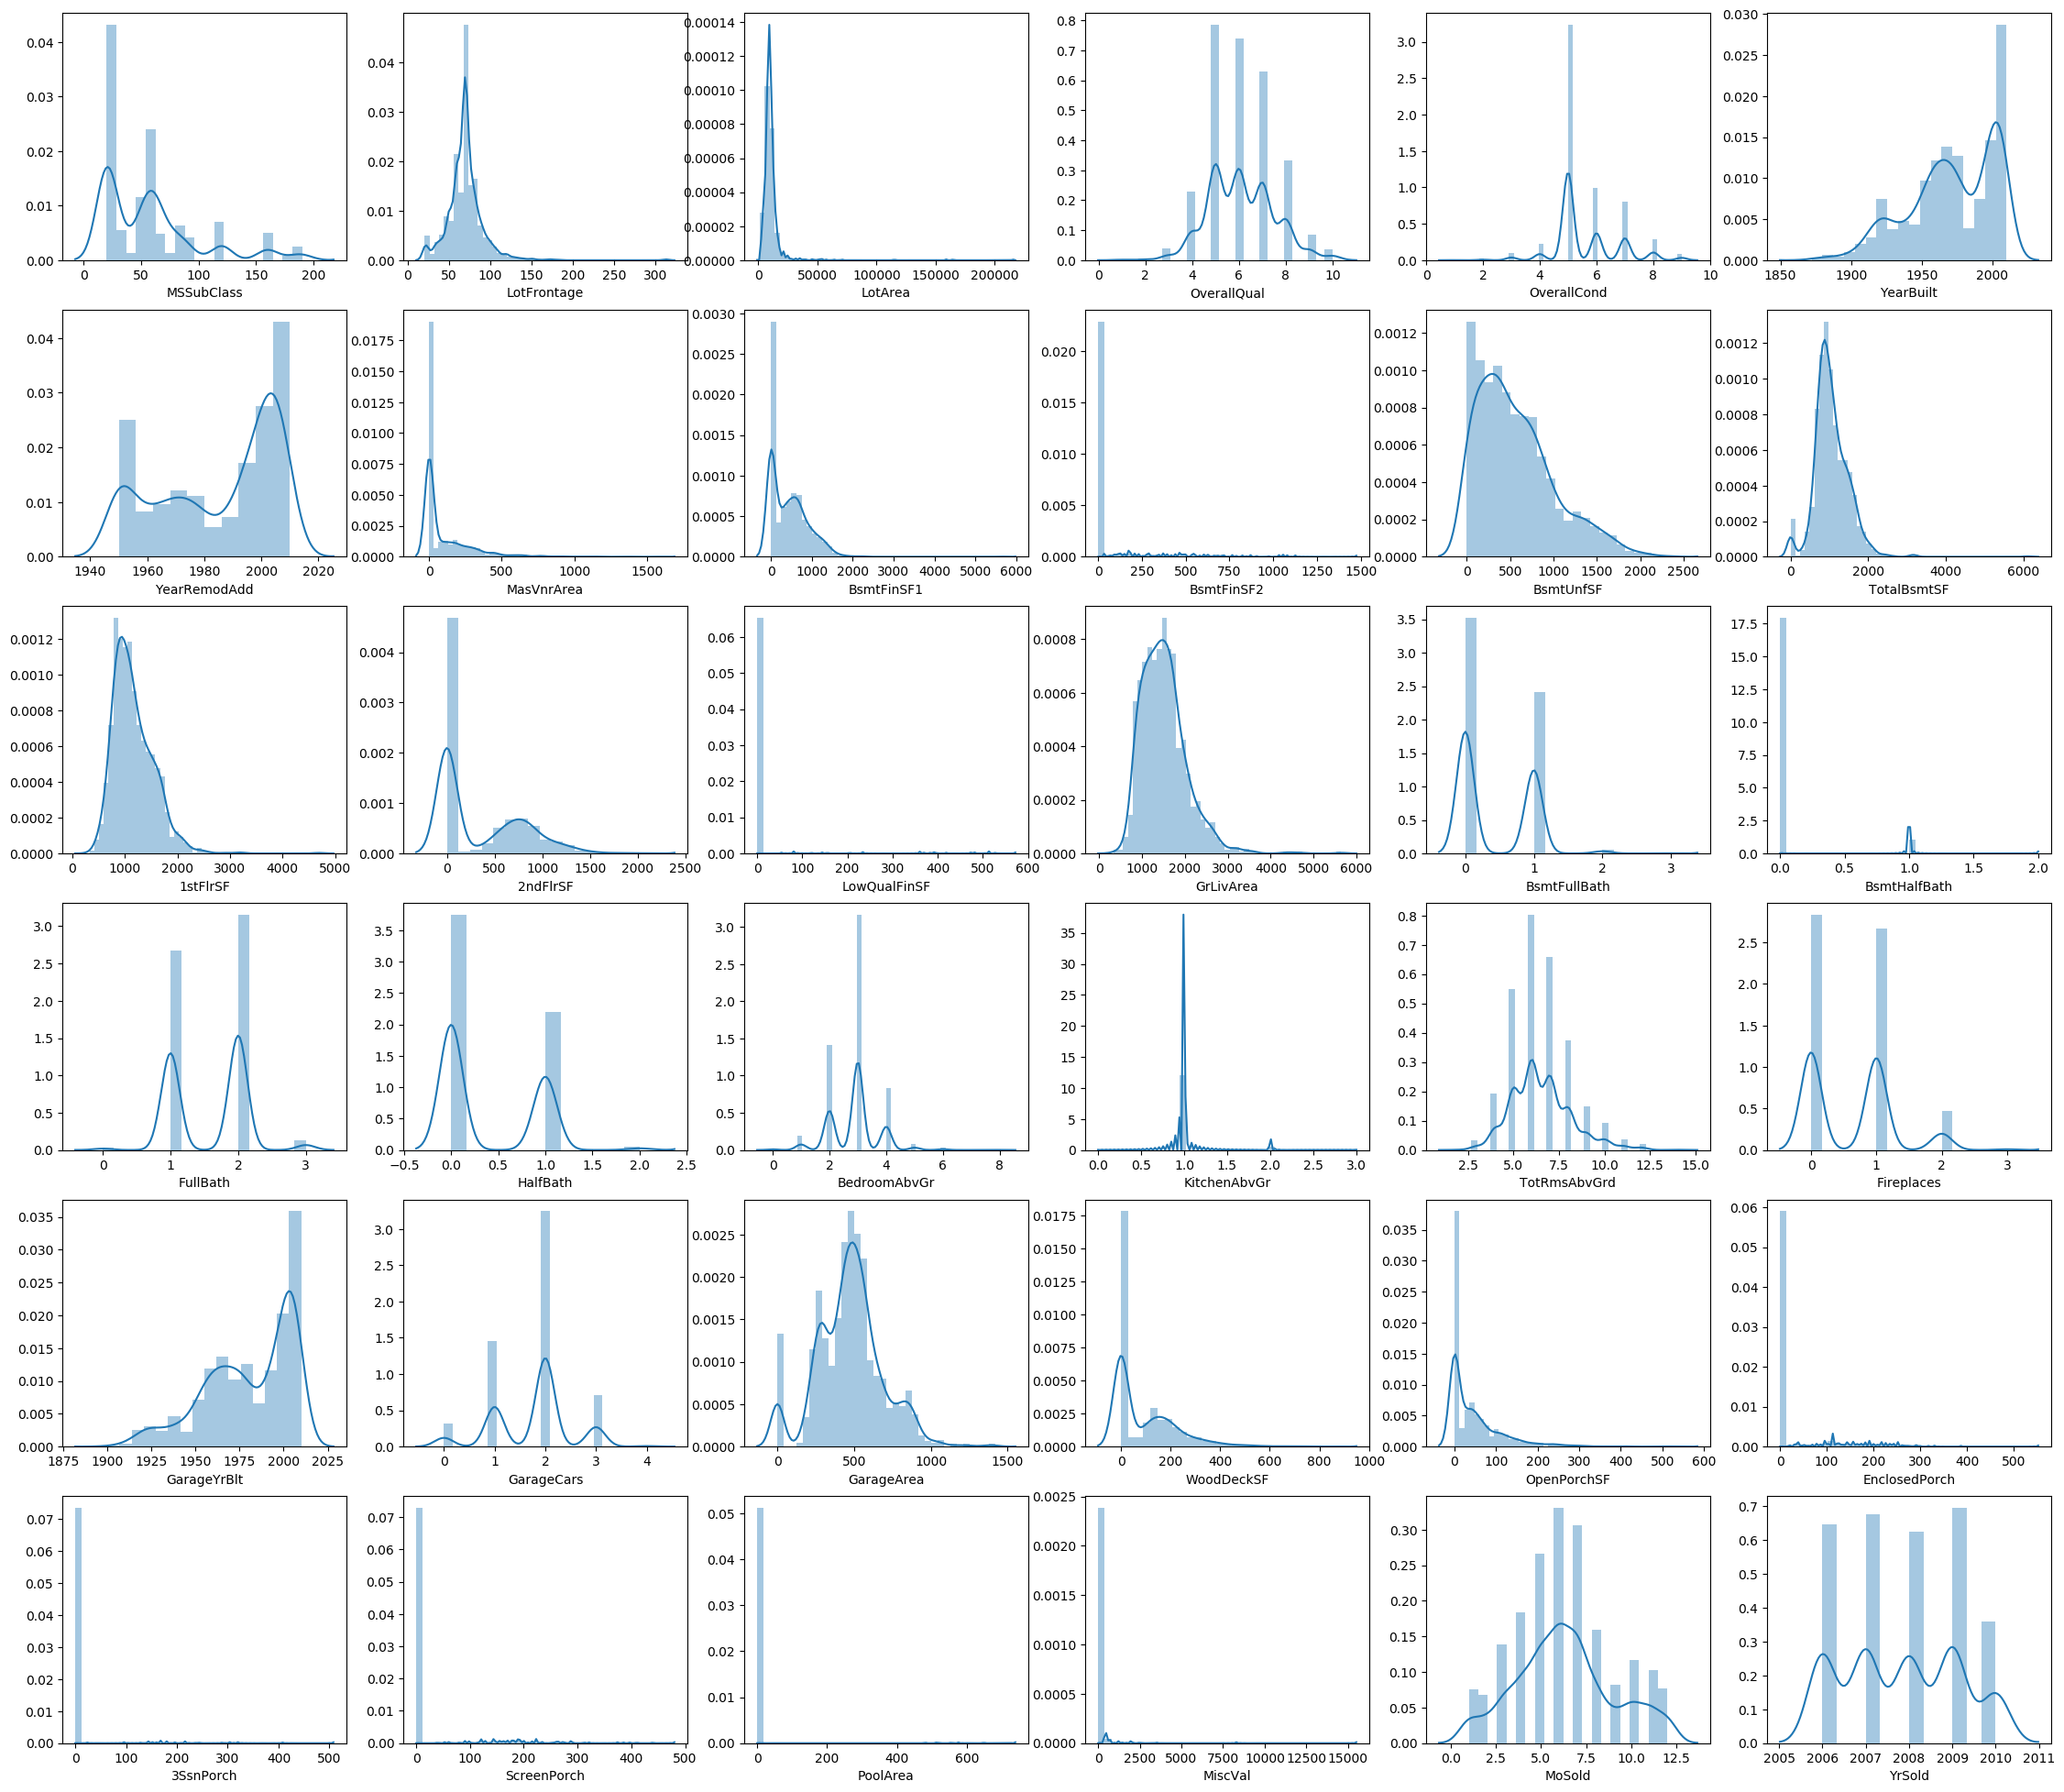

In [35]:
# Now, let's look at the distributions:

df_num_col = list(df_num.iloc[:,:36].columns)

plt.figure(figsize=(28,25),dpi=100)
for i in range(len(df_num_col)):
    plt.subplot(6,6,i+1)
    sns.distplot(df_num[df_num_col[i]]);

### Handle missing values

In [12]:
from scipy import stats

z_lot=stats.zscore(df_num.LotFrontage)

for i in range(1,7):
    print("Threshold value: ", i)
    print("Number of outliers:", len(np.where(z_lot>i)[0]),"\n")

print(len(np.where(z_lot>3)[0]))

Threshold value:  1
Number of outliers: 142 

Threshold value:  2
Number of outliers: 43 

Threshold value:  3
Number of outliers: 16 

Threshold value:  4
Number of outliers: 7 

Threshold value:  5
Number of outliers: 3 

Threshold value:  6
Number of outliers: 2 

16


11


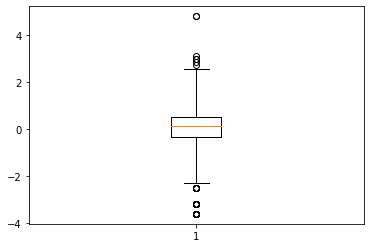

In [13]:
df_num["LotFrontage_log"] = np.log(df_num["LotFrontage"])
zscore_log=stats.zscore(df_num["LotFrontage_log"])
print(len(np.where(zscore_log>2.5)[0]))
plt.boxplot(zscore_log, whis=2.5);

# Then drop it
df_num.drop(["LotFrontage_log"], axis=1, inplace=True)

In [14]:
# I have chosen in below outlier list because of continuous variables

outlier=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","LowQualFinSF",
         "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]


for i in range(len(outlier)):
    print("Variable: ", outlier[i])
    zscore_outlier=stats.zscore(df_num[outlier[i]])
    print("Number of outliers higher than threshold 2.5 : ", len(np.where(zscore_outlier>2.5)[0]))
    print("*"*40)


Variable:  LotFrontage
Number of outliers higher than threshold 2.5 :  24
****************************************
Variable:  LotArea
Number of outliers higher than threshold 2.5 :  17
****************************************
Variable:  MasVnrArea
Number of outliers higher than threshold 2.5 :  49
****************************************
Variable:  BsmtFinSF1
Number of outliers higher than threshold 2.5 :  14
****************************************
Variable:  BsmtFinSF2
Number of outliers higher than threshold 2.5 :  67
****************************************
Variable:  BsmtUnfSF
Number of outliers higher than threshold 2.5 :  30
****************************************
Variable:  TotalBsmtSF
Number of outliers higher than threshold 2.5 :  15
****************************************
Variable:  1stFlrSF
Number of outliers higher than threshold 2.5 :  22
****************************************
Variable:  LowQualFinSF
Number of outliers higher than threshold 2.5 :  21
*****************

In [15]:
# Let's analyze using percentile method for "LotFrontage" column as an example

Q1 = np.percentile(df_num["LotFrontage"],25)
Q3 = np.percentile(df_num["LotFrontage"],75)

IQR= Q3-Q1
Lower=Q1 - (1.5*IQR)
Upper=Q3 + (1.5*IQR)

print("Number of outliers lower than Lower",len(df_num[df_num["LotFrontage"]<Lower]))
print("Number of outliers higher than Higher", len(df_num[df_num["LotFrontage"]>Upper]))

Number of outliers lower than Lower 48
Number of outliers higher than Higher 58


In [16]:
from scipy.stats.mstats import winsorize

In [17]:
# Now, firstly i will get log transformation continuous variable in "outlier" list and i'll winsorize "outliers_wins" list; then i will cut outliers if threshold is higher than 2.5:


outlier=["LotFrontage","LotArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","GrLivArea","GarageArea"]

for i in range(len(outlier)):
    df_num[outlier[i]]=np.log(df_num[outlier[i]])
    
print("*"*40,"Continuous Variables","*"*40)    
for j in range(len(outlier)):
    print("Variable: ", outlier[j])
    zscore_outlier=stats.zscore(df_num[outlier[j]])
    print("Number of outliers higher than threshold 2 : ", len(np.where(zscore_outlier>2.5)[0]))
    print("*"*40,"\n")    

 
    
    
outlier_wins=["MasVnrArea","BsmtFinSF1","BsmtFinSF2","LowQualFinSF","WoodDeckSF","OpenPorchSF","EnclosedPorch",
              "3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

for k in range(len(outlier_wins)):
    df_num[outlier_wins[k]]=stats.mstats.winsorize(df_num[outlier_wins[k]], limits=0.05)    

    
print("*"*40,"Categorical Numeric Variables","*"*40)
for j in range(len(outlier_wins)):
    
    print("Variable: ", outlier_wins[j])
    zscore_outlier_wins=stats.zscore(df_num[outlier_wins[j]])
    print("Number of outliers higher than threshold 2 : ", len(np.where(zscore_outlier_wins>2.5)[0]))
    print("*"*40)  
    
    
# After the log transformation, we get rid of most of outliers; now, "LotFrontage","LotArea","1stFlrSF","GrLivArea" columns will be dropped
# because of still have outliers

**************************************** Continuous Variables ****************************************
Variable:  LotFrontage
Number of outliers higher than threshold 2 :  11
**************************************** 

Variable:  LotArea
Number of outliers higher than threshold 2 :  19
**************************************** 

Variable:  BsmtUnfSF
Number of outliers higher than threshold 2 :  0
**************************************** 

Variable:  TotalBsmtSF
Number of outliers higher than threshold 2 :  0
**************************************** 

Variable:  1stFlrSF
Number of outliers higher than threshold 2 :  7
**************************************** 

Variable:  GrLivArea
Number of outliers higher than threshold 2 :  9
**************************************** 

Variable:  GarageArea
Number of outliers higher than threshold 2 :  0
**************************************** 

**************************************** Categorical Numeric Variables **************************************

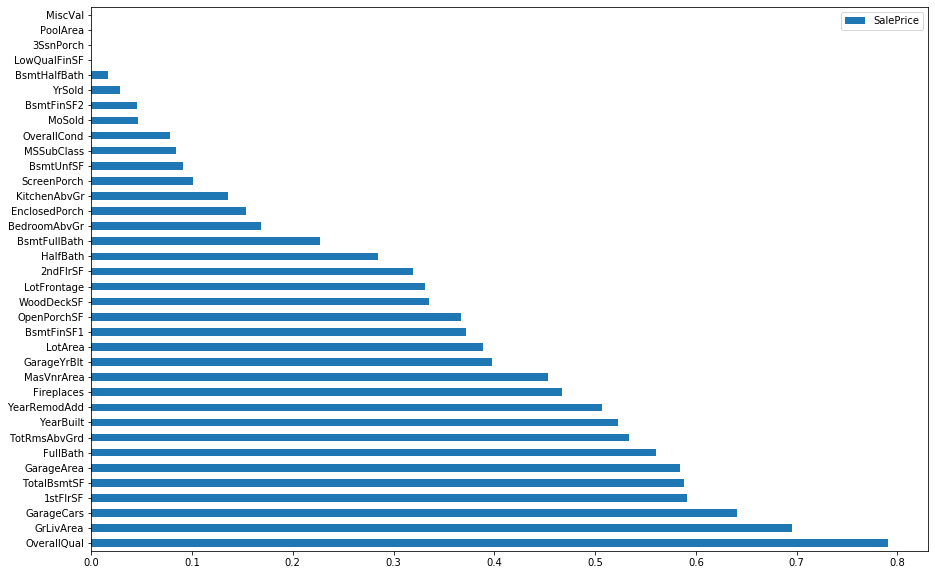

In [19]:
# I have seperated categorical variable and numerical variable so i will firstly analyze relationship between numerical variables
focus_col=["SalePrice"]

df_num.corr().filter(focus_col).drop(focus_col).abs().sort_values(by="SalePrice", ascending=False).plot(kind="barh", figsize=(15,10));

# According to graph, the most correlated value is "OverallQual".

In [18]:
pd.options.display.max_columns
pd.set_option("display.max_columns",None)

df_num["MasVnrArea"]=df_num["MasVnrArea"].astype("int64")
display(df_num.head(7))
print(len(df_num.columns))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,4.174387,9.041922,7,5,2003,2003,196,706,0,5.010635,6.752270,6.752270,854,0,7.444249,1,0,2,1,3,1,8,0,2003,2,6.306275,0,61,0,0,0,0,0,2,2008,208500
1,20,4.382027,9.169518,6,8,1976,1976,0,978,0,5.648974,7.140453,7.140453,0,0,7.140453,0,1,2,0,3,1,6,1,1976,2,6.131226,298,0,0,0,0,0,0,5,2007,181500
2,60,4.219508,9.328123,7,5,2001,2002,162,486,0,6.073045,6.824374,6.824374,866,0,7.487734,1,0,2,1,3,1,6,1,2001,2,6.410175,0,42,0,0,0,0,0,9,2008,223500
3,70,4.094345,9.164296,7,5,1915,1970,0,216,0,6.291569,6.628041,6.867974,756,0,7.448334,1,0,1,0,3,1,7,1,1998,3,6.464588,0,35,180,0,0,0,0,2,2006,140000
4,60,4.430817,9.565214,8,5,2000,2000,350,655,0,6.194405,7.043160,7.043160,1053,0,7.695303,1,0,2,1,4,1,9,1,2000,3,6.728629,192,84,0,0,0,0,0,12,2008,250000
5,50,4.442651,9.554993,5,5,1993,1995,0,732,0,4.158883,6.679599,6.679599,566,0,7.216709,1,0,1,1,1,1,5,0,1993,2,6.173786,40,30,0,0,0,0,0,10,2009,143000
6,20,4.317488,9.218705,8,5,2004,2005,186,1274,0,5.758902,7.430114,7.434848,0,0,7.434848,1,0,2,0,3,1,7,1,2004,2,6.455199,255,57,0,0,0,0,0,8,2007,307000


37


In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X=df_num.iloc[:,:36]
Y=df_num["SalePrice"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

reg=linear_model.LinearRegression()

reg.fit(X_train,Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [20]:
from sklearn.ensemble import RandomForestRegressor

X=df_num.iloc[:,:36]
Y=df_num["SalePrice"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

forest=RandomForestRegressor(n_estimators=100,
                             max_depth=7)

forest.fit(X_train,Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## Feature Selection for Categorical Variables

In [61]:
# Now, I will analyze the categorical variables
df_cat.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


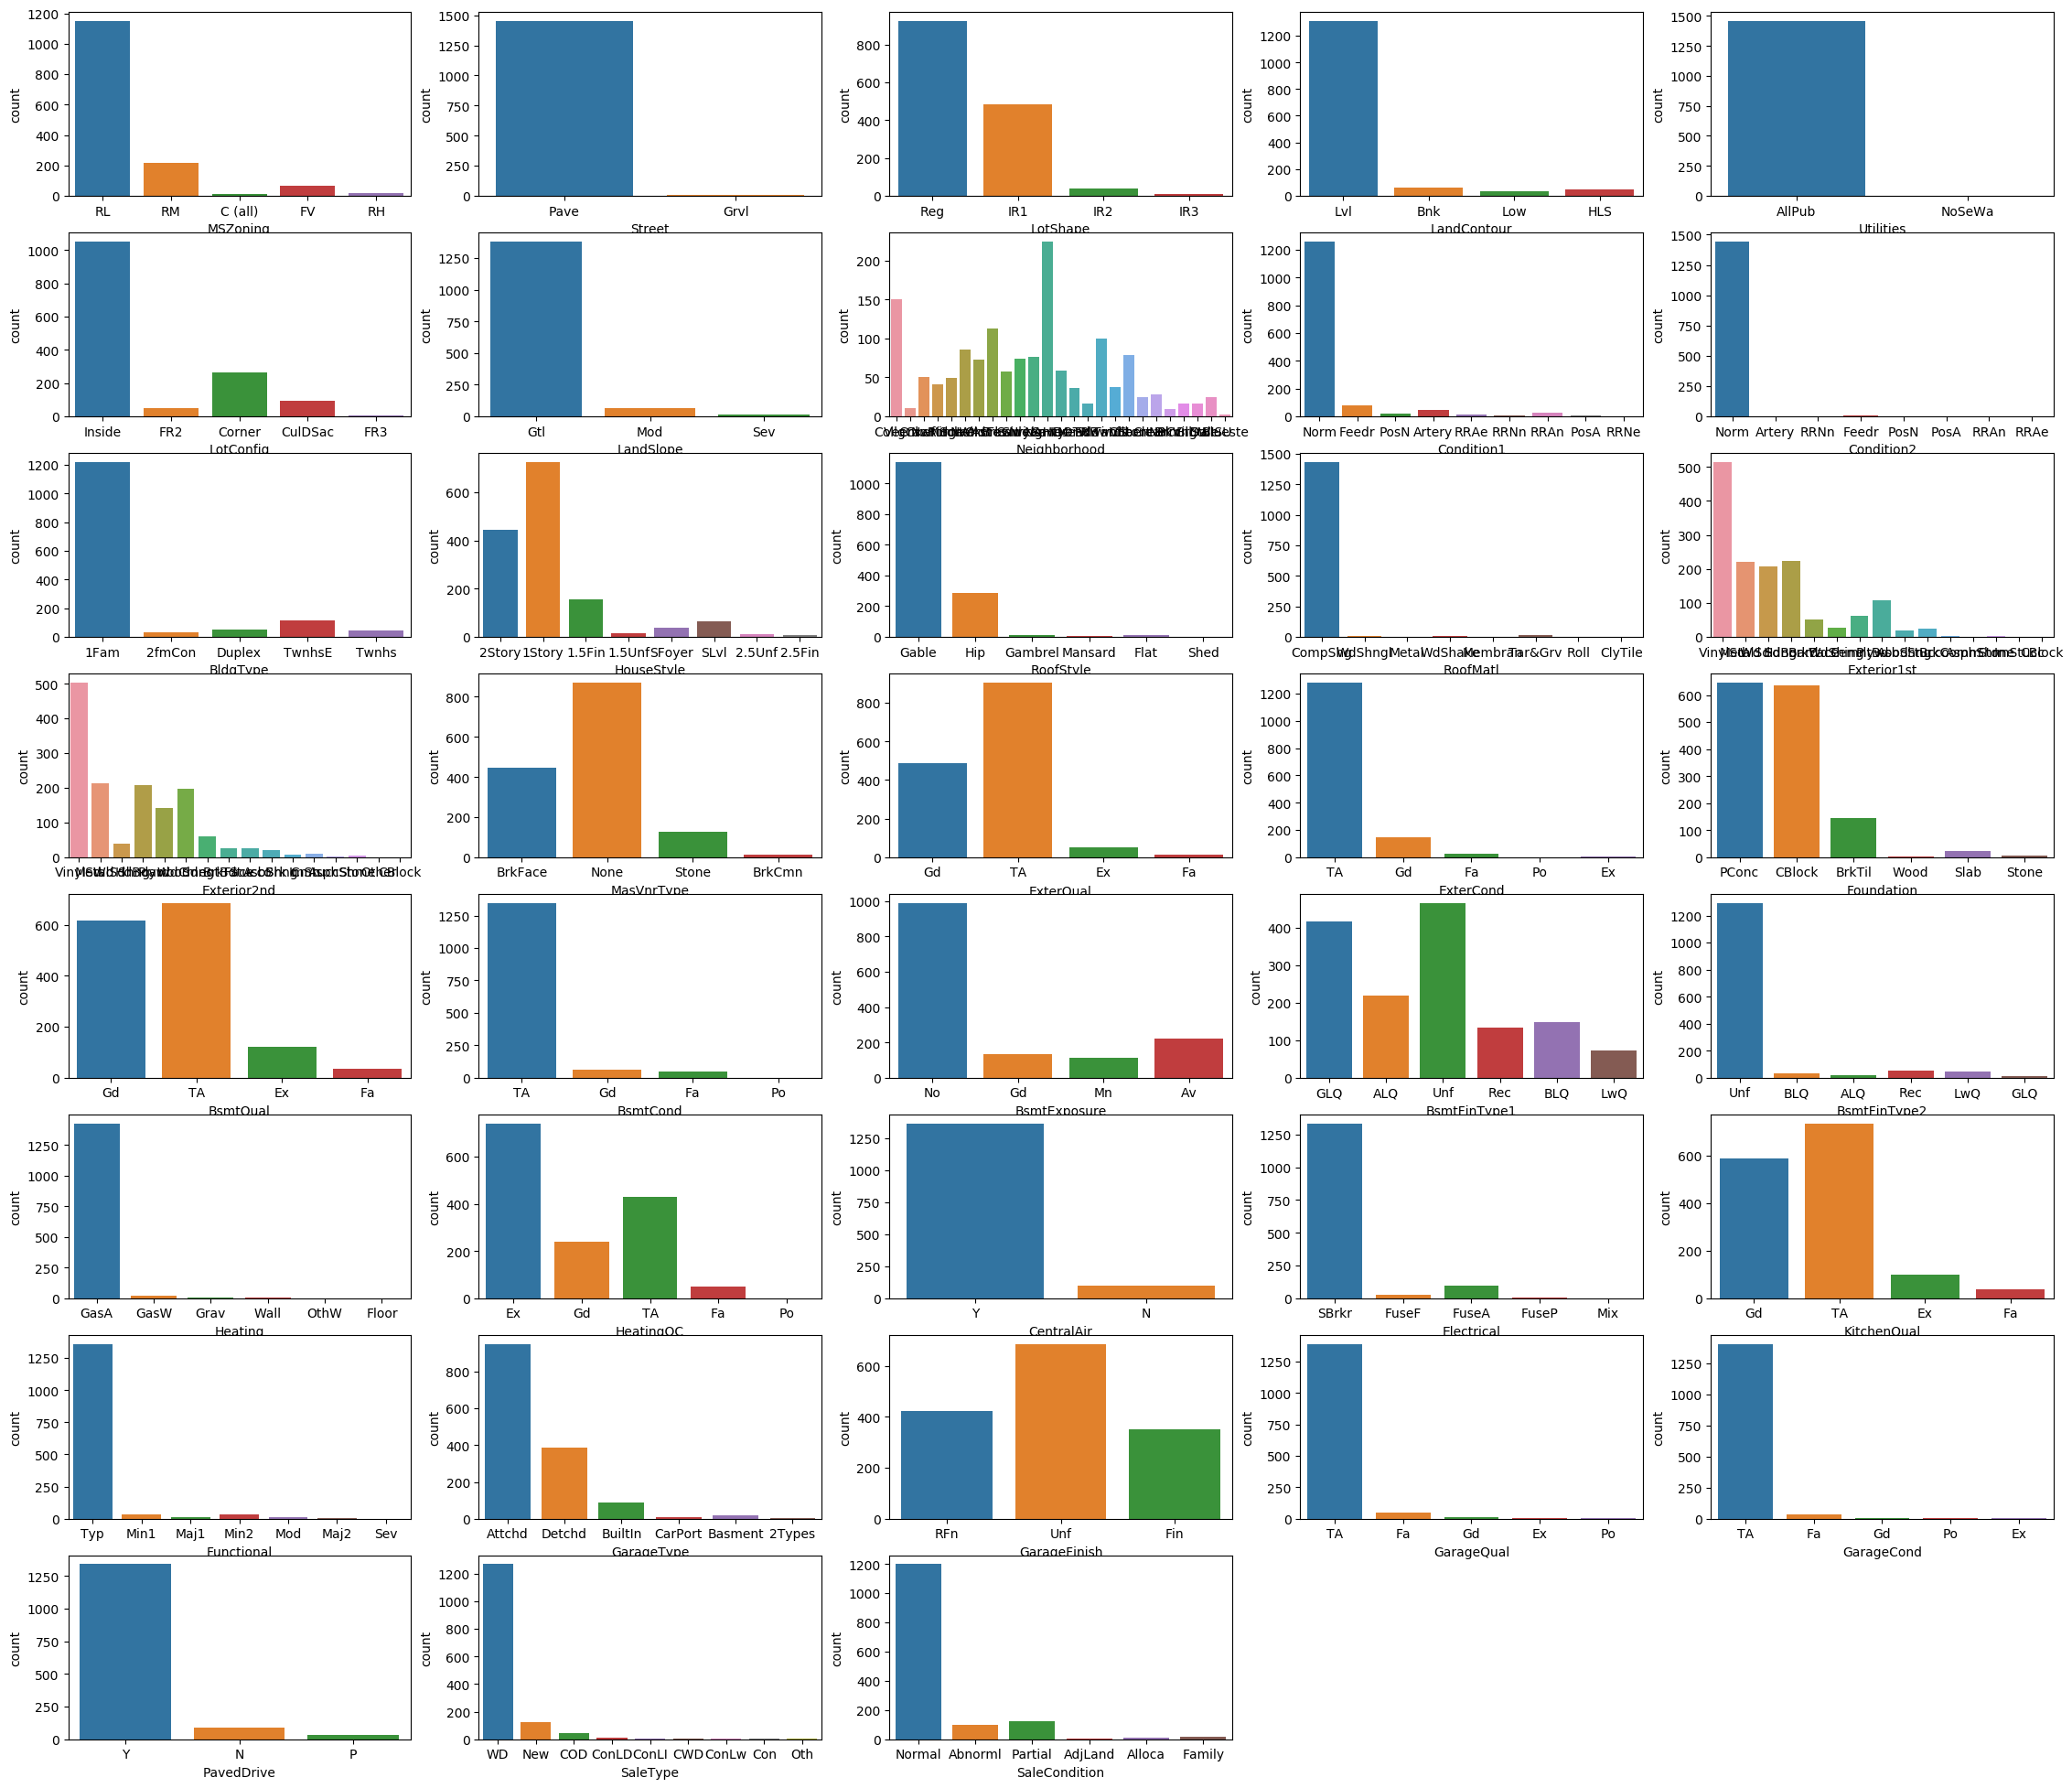

In [39]:
df_cat_col=list(df_cat.columns)
plt.figure(figsize=(28,25),dpi=100)
for i in range(len(df_cat_col)):
    plt.subplot(8,5,i+1)
    sns.countplot(df_cat[df_cat_col[i]]);

In [62]:
from sklearn.preprocessing import LabelEncoder

df_cat_col=list(df_cat.columns)
for i in range(len(df_cat_col)):
    df_cat[df_cat_col[i]] = LabelEncoder().fit_transform(df_cat[df_cat_col[i]])
    

In [64]:
df_cat["SalePrice"]=df_num["SalePrice"]

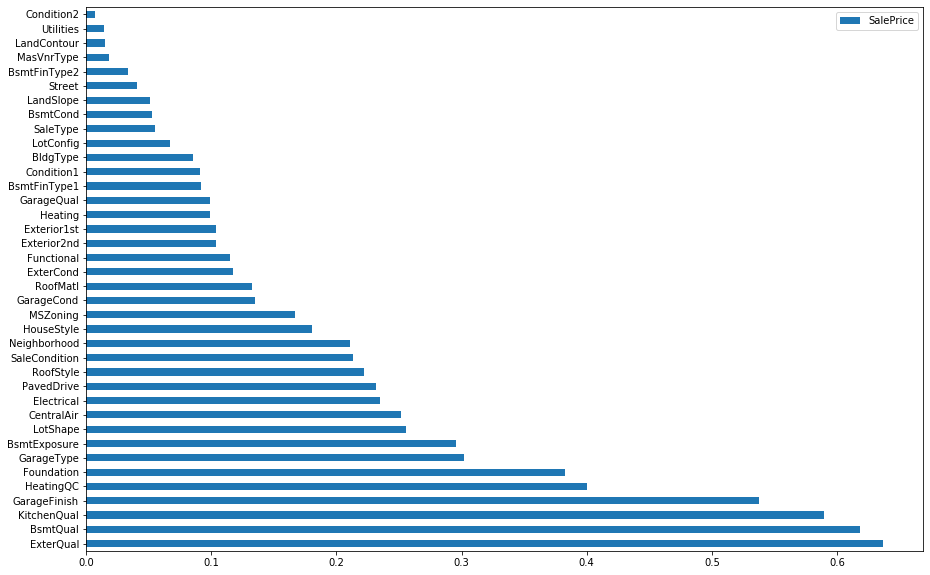

In [65]:
# I have seperated categorical variable and numerical variable so i will firstly analyze relationship between numerical variables
focus_cols=["SalePrice"]

df_cat.corr().filter(focus_cols).drop(focus_cols).abs().sort_values(by="SalePrice", ascending=False).plot(kind="barh", figsize=(15,10));

In [87]:
df_cat.head(2)
#print(len(df_cat.columns))

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4,208500
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4,181500


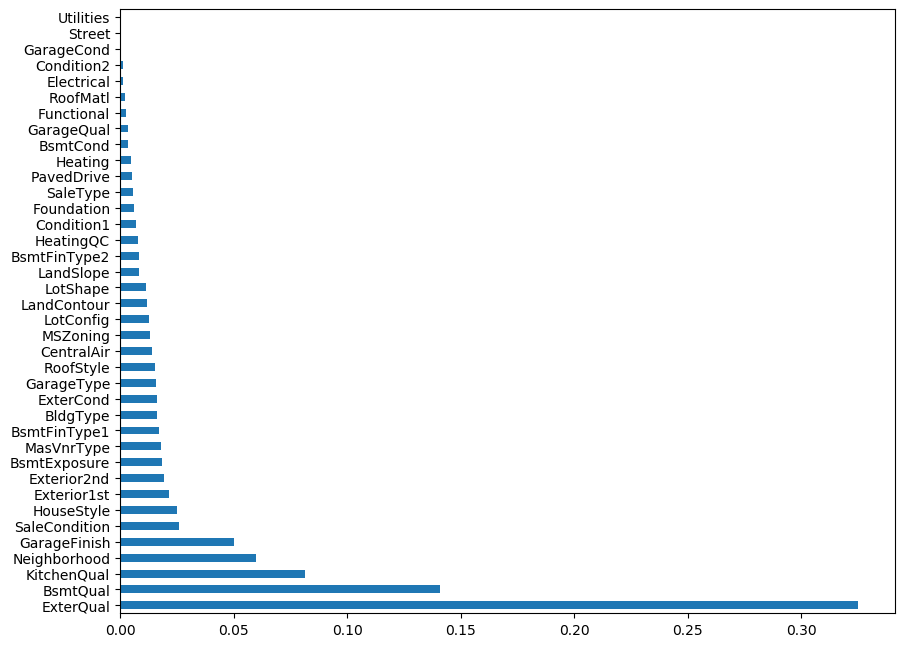

In [83]:
X_cat=df_cat.iloc[:,:38]
Y_cat=df_cat["SalePrice"]

X_cat_train, X_cat_test, Y_cat_train, Y_cat_test = train_test_split(X_cat, Y_cat, test_size=0.20, random_state=42)

forest_cat=RandomForestRegressor()
forest_cat.fit(X_cat_train,Y_cat_train)

feature_import=pd.Series(data=forest_cat.feature_importances_, index=X_cat_train.columns)
feature_import=feature_import.sort_values(ascending=False)
plt.figure(figsize=(10,8),dpi=100)
feature_import.plot(kind="barh");

# It looks like correlation matrix

In [98]:
from sklearn.decomposition import PCA


pca_cat=PCA(n_components=38)

X_cat=pca_cat.fit_transform(X_cat)

TypeError: float() argument must be a string or a number, not 'StandardScaler'